### Pipeline demo notebook

#### Split Mnist task

In [1]:
import sys
sys.path.append("..")
from frcl.experiments.pipeline import BaselineTrainDemo, FRCLTrainDemo
from frcl.tasks import SplitMnistTask, PermutedMnistTask
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
task = SplitMnistTask()
frcl_pipeline = FRCLTrainDemo(task, n_repeat=1, device='cpu', n_epochs=4, lr=1e-5, batch_size=100, n_inducing=10, n_classes=2)
baseline_pipeline = BaselineTrainDemo(task, n_repeat=1, device='cpu', n_epochs=4, lr=1e-5, batch_size=100, n_inducing=10, n_classes=2)

/content/frcl/experiments/pipeline.py:64: UserWarning: n_classes option not supported now
  warnings.warn("n_classes option not supported now")


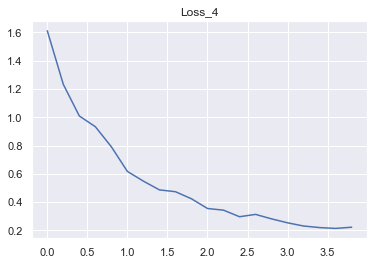

In [ ]:
frcl_res = frcl_pipeline.run()

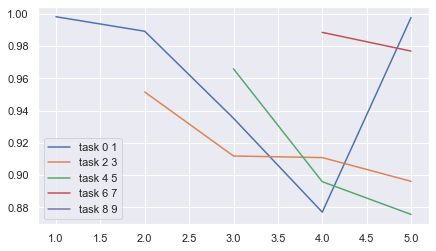

In [ ]:
tasks = [(0, 1), (2, 3), (4 ,5), (6, 7), (8, 9)]

fig = plt.figure(figsize=(7, 4))
for i, lbls in enumerate(tasks):
    lbl0, lbl1 = lbls
    x, y = frcl_res[0][0].get_task_estimations(i)
    plt.plot(x, y, label = "task {} {}".format(lbl0, lbl1))
    plt.legend()
plt.show()

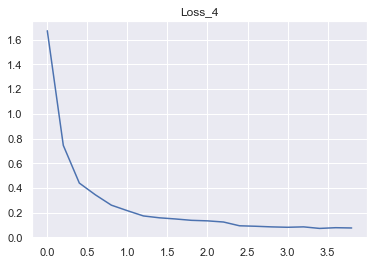

In [ ]:
baseline_res = baseline_pipeline.run()

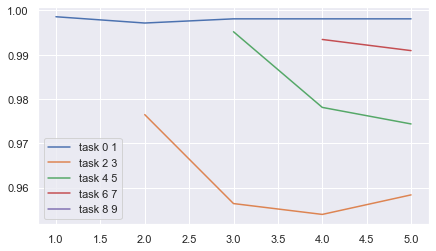

In [ ]:
tasks = [(0, 1), (2, 3), (4 ,5), (6, 7), (8, 9)]

fig = plt.figure(figsize=(7, 4))
for i, lbls in enumerate(tasks):
    lbl0, lbl1 = lbls
    x, y = baseline_res[0][0].get_task_estimations(i)
    plt.plot(x, y, label = "task {} {}".format(lbl0, lbl1))
    plt.legend()
plt.show()

#### Permuted Mnist task

In [ ]:
n_tasks = 10
task = PermutedMnistTask(n_tasks)
baseline_pipeline = BaselineTrainDemo(task, n_repeat=1, device='cuda', n_epochs=10, lr=1e-5, batch_size=100, n_inducing=10, n_classes=10)

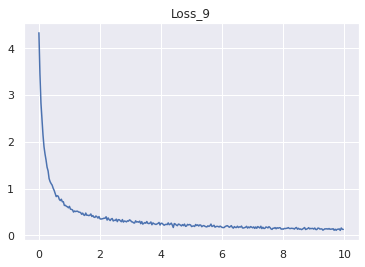

/content/frcl/frcl.py:106: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  distr = self.pred_func(torch.matmul(self.base(x), omega.T).squeeze())


In [ ]:
baseline_res = baseline_pipeline.run()

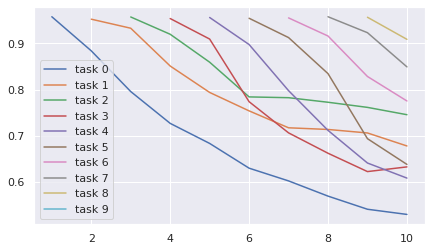

In [ ]:
fig = plt.figure(figsize=(7, 4))
for i in range(n_tasks):
    x, y = baseline_res[0][0].get_task_estimations(i)
    plt.plot(x, y, label = "task {}".format(i))
    plt.legend()
plt.show()

In [3]:
from frcl.experiments.pipeline import FRCLStatTrace
n_tasks = 10
task = PermutedMnistTask(n_tasks)
frcl_pipeline = FRCLStatTrace(task, n_repeat=1, device='cpu',
                              n_epochs=20, lr=1e-4, batch_size=64, n_inducing=200, n_classes=10)

In [ ]:
frcl_res = frcl_pipeline.run()

/home/pandreev/sag/lib/python3.6/site-packages/torch/nn/modules/container.py:434: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")
Task: 0; Epoch: 0:   0%|          | 1/938 [00:05<1:22:56,  5.31s/it]../frcl/experiments/state.py:55: UserWarning: Change definintion of name 'e'
  warnings.warn("Change definintion of name '{}'".format(name))
../frcl/experiments/state.py:55: UserWarning: Change definintion of name 'kls'
  warnings.warn("Change definintion of name '{}'".format(name))


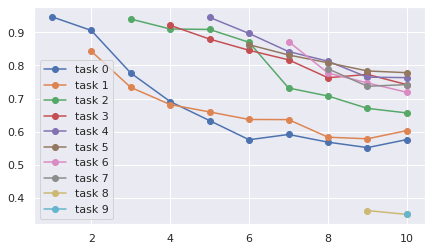

In [15]:
fig = plt.figure(figsize=(7, 4))

Y = []
for i in range(n_tasks):
    x, y = frcl_res[0][0].get_task_estimations(i)
    Y.append(y)
    plt.plot(x, y, "-o", label = "task {}".format(i))
    plt.legend()
plt.savefig("../out/plot_permutedMNIST_ind10.png")
plt.show()

0.6284599999999999


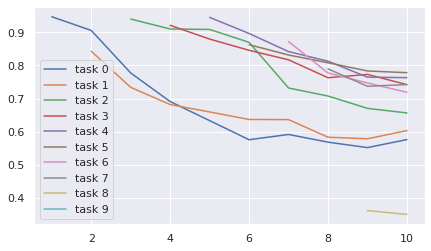

In [10]:
fig = plt.figure(figsize=(7, 4))

Y = []
for i in range(n_tasks):
    x, y = frcl_res[0][0].get_task_estimations(i)
    Y.append(y)
    plt.plot(x, y, label = "task {}".format(i))
  #  plt.scatter(x, y, label = "task {}".format(i))
    plt.legend()
#plt.savefig("./out/full_plot_bs{}_N{}.png".format(str(args.bs), str(args.N)))

import numpy as np
print(np.mean([y[-1] for y in Y]))

In [ ]:
import numpy as np
np.mean([y[-1] for y in Y])

0.82768

In [14]:
import torch
torch.save(frcl_pipeline.cl_model.state_dict(), "./model_PermMnist10")

#### Omniglot task

In [2]:
from frcl.experiments.pipeline import BaselineTrainDemo
from frcl.tasks import OmniglotTask

In [10]:
task = OmniglotTask(n_tasks=5)
baseline_pipeline =  BaselineTrainDemo(task, n_repeat=1, device='cuda', n_epochs=5, lr=1e-4, batch_size=32, n_inducing=10)

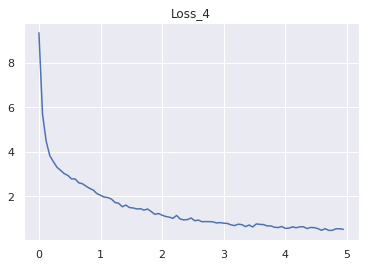

/content/frcl/frcl.py:123: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  distr = self.pred_func(torch.matmul(self.base(x), omega.T).squeeze())


In [11]:
res_baseline = baseline_pipeline.run()

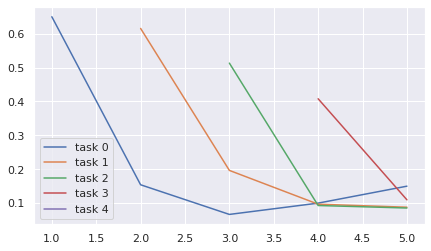

In [13]:
fig = plt.figure(figsize=(7, 4))
for i in range(5):
    x, y = res_baseline[0][0].get_task_estimations(i)
    plt.plot(x, y, label = "task {}".format(i))
    plt.legend()
plt.show()

In [3]:
from frcl.experiments.pipeline import FRCLStatTrace

In [4]:
task = OmniglotTask(n_tasks=2)
frcl_pipeline =  FRCLStatTrace(task, n_repeat=1, device='cuda', n_epochs=1, lr=3*1e-5, batch_size=32, n_inducing=50)

N tasks: 2, Epoch 0


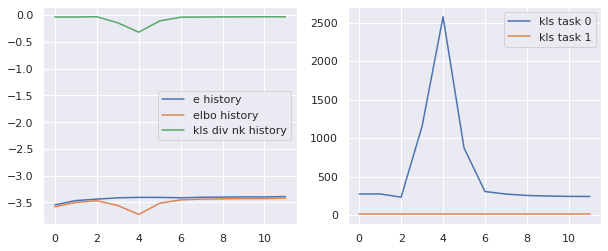

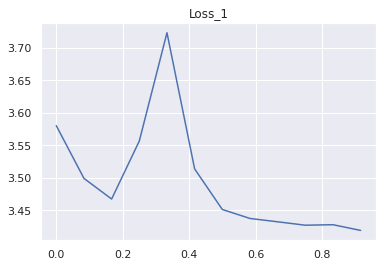

/content/frcl/frcl.py:355: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  predicted += self.pred_func(torch.stack(sample, axis=1))


In [5]:
res_frcl = frcl_pipeline.run()

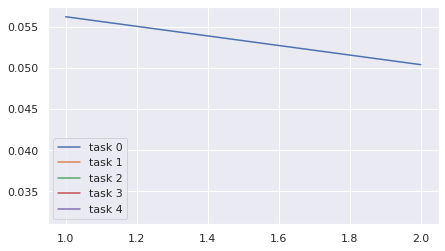

In [6]:
fig = plt.figure(figsize=(7, 4))
for i in range(5):
    x, y = res_frcl[0][0].get_task_estimations(i)
    plt.plot(x, y, label = "task {}".format(i))
    plt.legend()
plt.show()

In [2]:
from frcl.frcl import FRCL
import torch

In [3]:
m = FRCL(torch.nn.Linear(12,12), 12, "cpu", multiclass=True)

In [18]:
m.create_new_task(4)

In [11]:
from torch.optim import SGD

In [12]:
opt = SGD(m.parameters(), lr=0.001)

In [14]:

opt.step()

In [19]:
list(m.parameters())

[Parameter containing:
 tensor([[ 0.1143,  0.0323, -0.2521, -0.0650,  0.2454,  0.2070, -0.2366,  0.2170,
          -0.0224, -0.2126,  0.1325, -0.1394],
         [-0.1560,  0.1422, -0.0615, -0.1609,  0.1329, -0.2350,  0.1043,  0.0719,
           0.1275,  0.0672, -0.2498, -0.0933],
         [ 0.0954, -0.1517, -0.0189, -0.1993,  0.0660,  0.1316,  0.0924, -0.0412,
           0.2661,  0.0916, -0.1527,  0.1164],
         [ 0.2553, -0.0393,  0.2173, -0.0047,  0.2406, -0.0257,  0.2275, -0.2813,
           0.2575, -0.2156, -0.0705, -0.1006],
         [ 0.0201,  0.1692,  0.2186, -0.2794,  0.0733,  0.1360,  0.1151, -0.1644,
          -0.1800,  0.0211, -0.2103, -0.2628],
         [ 0.0885,  0.1747,  0.0546, -0.0033,  0.2304, -0.1146, -0.1638,  0.2662,
          -0.1841,  0.0294, -0.2767,  0.0374],
         [ 0.2037, -0.2217,  0.2027,  0.2345, -0.1300, -0.2600,  0.1999,  0.1532,
          -0.2456, -0.1763,  0.2808, -0.2542],
         [ 0.2434,  0.1384, -0.1450, -0.0462, -0.1421, -0.2341, -0.1181,  

In [ ]:
m.register_parameter()